In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'

In [4]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,0,...,20.7,0,0,0,0.7,0.7,0.06,-0.7,-0.7,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,2,...,18.7,0,0,0,1.2,1.2,0.07,+0.8,+0.8,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,1,...,20.3,0,0,0,0.8,0.8,0.04,+0.2,+0.2,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,0,...,22.4,0,0,0,2.0,2.0,0.07,-2.0,-2.0,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2886,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,2,...,13.7,0,0,0,2.0,2.0,0.09,0.0,0.0,Matches
3001,2887,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,6,...,18.9,0,0,0,3.9,3.9,0.09,+2.1,+2.1,Matches
3002,2888,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,6,...,20.6,12,0,0,4.6,4.6,0.09,+1.4,+1.4,Matches
3003,2889,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,5,...,9.8,0,1,1,5.4,4.6,0.10,-0.4,-0.6,Matches


In [5]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,1043,...,44.4,2,1.4,+0.6,19,48,36,8,92,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,1239,...,61.1,0,0.3,-0.3,7,77,6,0,87,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,1532,...,86.0,0,1.1,-1.1,15,77,13,1,81,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,1282,...,66.6,2,2.8,-0.8,28,121,17,6,126,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,2,...,NaN,0,0.0,0.0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2886,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,1174,...,69.9,1,1.0,0.0,15,113,10,1,97,Matches
3001,2887,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,704,...,61.4,2,1.5,+0.5,19,51,19,3,65,Matches
3002,2888,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,1253,...,68.1,4,6.3,-2.3,68,91,61,3,140,Matches
3003,2889,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,408,...,64.3,4,2.8,+1.2,29,18,4,0,30,Matches


In [6]:
data_shooting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 3004
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rk       2890 non-null   object
 1   Player   2890 non-null   object
 2   Nation   2889 non-null   object
 3   Pos      2890 non-null   object
 4   Squad    2890 non-null   object
 5   Comp     2890 non-null   object
 6   Age      2889 non-null   object
 7   Born     2889 non-null   object
 8   90s      2890 non-null   object
 9   Gls      2890 non-null   object
 10  Sh       2890 non-null   object
 11  SoT      2890 non-null   object
 12  SoT%     2353 non-null   object
 13  Sh/90    2890 non-null   object
 14  SoT/90   2890 non-null   object
 15  G/Sh     2353 non-null   object
 16  G/SoT    1973 non-null   object
 17  Dist     2353 non-null   object
 18  FK       2890 non-null   object
 19  PK       2890 non-null   object
 20  PKatt    2890 non-null   object
 21  xG       2890 non-null   object
 22  

In [7]:
d = data_shooting[['Player', '90s', 'Gls', 'Sh', 'SoT', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']]

In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
player_data = pd.merge(player_position, d, on="Player")
player_data.drop_duplicates(inplace=True)
player_data.iloc[:, 3:] = player_data.iloc[:, 3:].astype(float)

c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

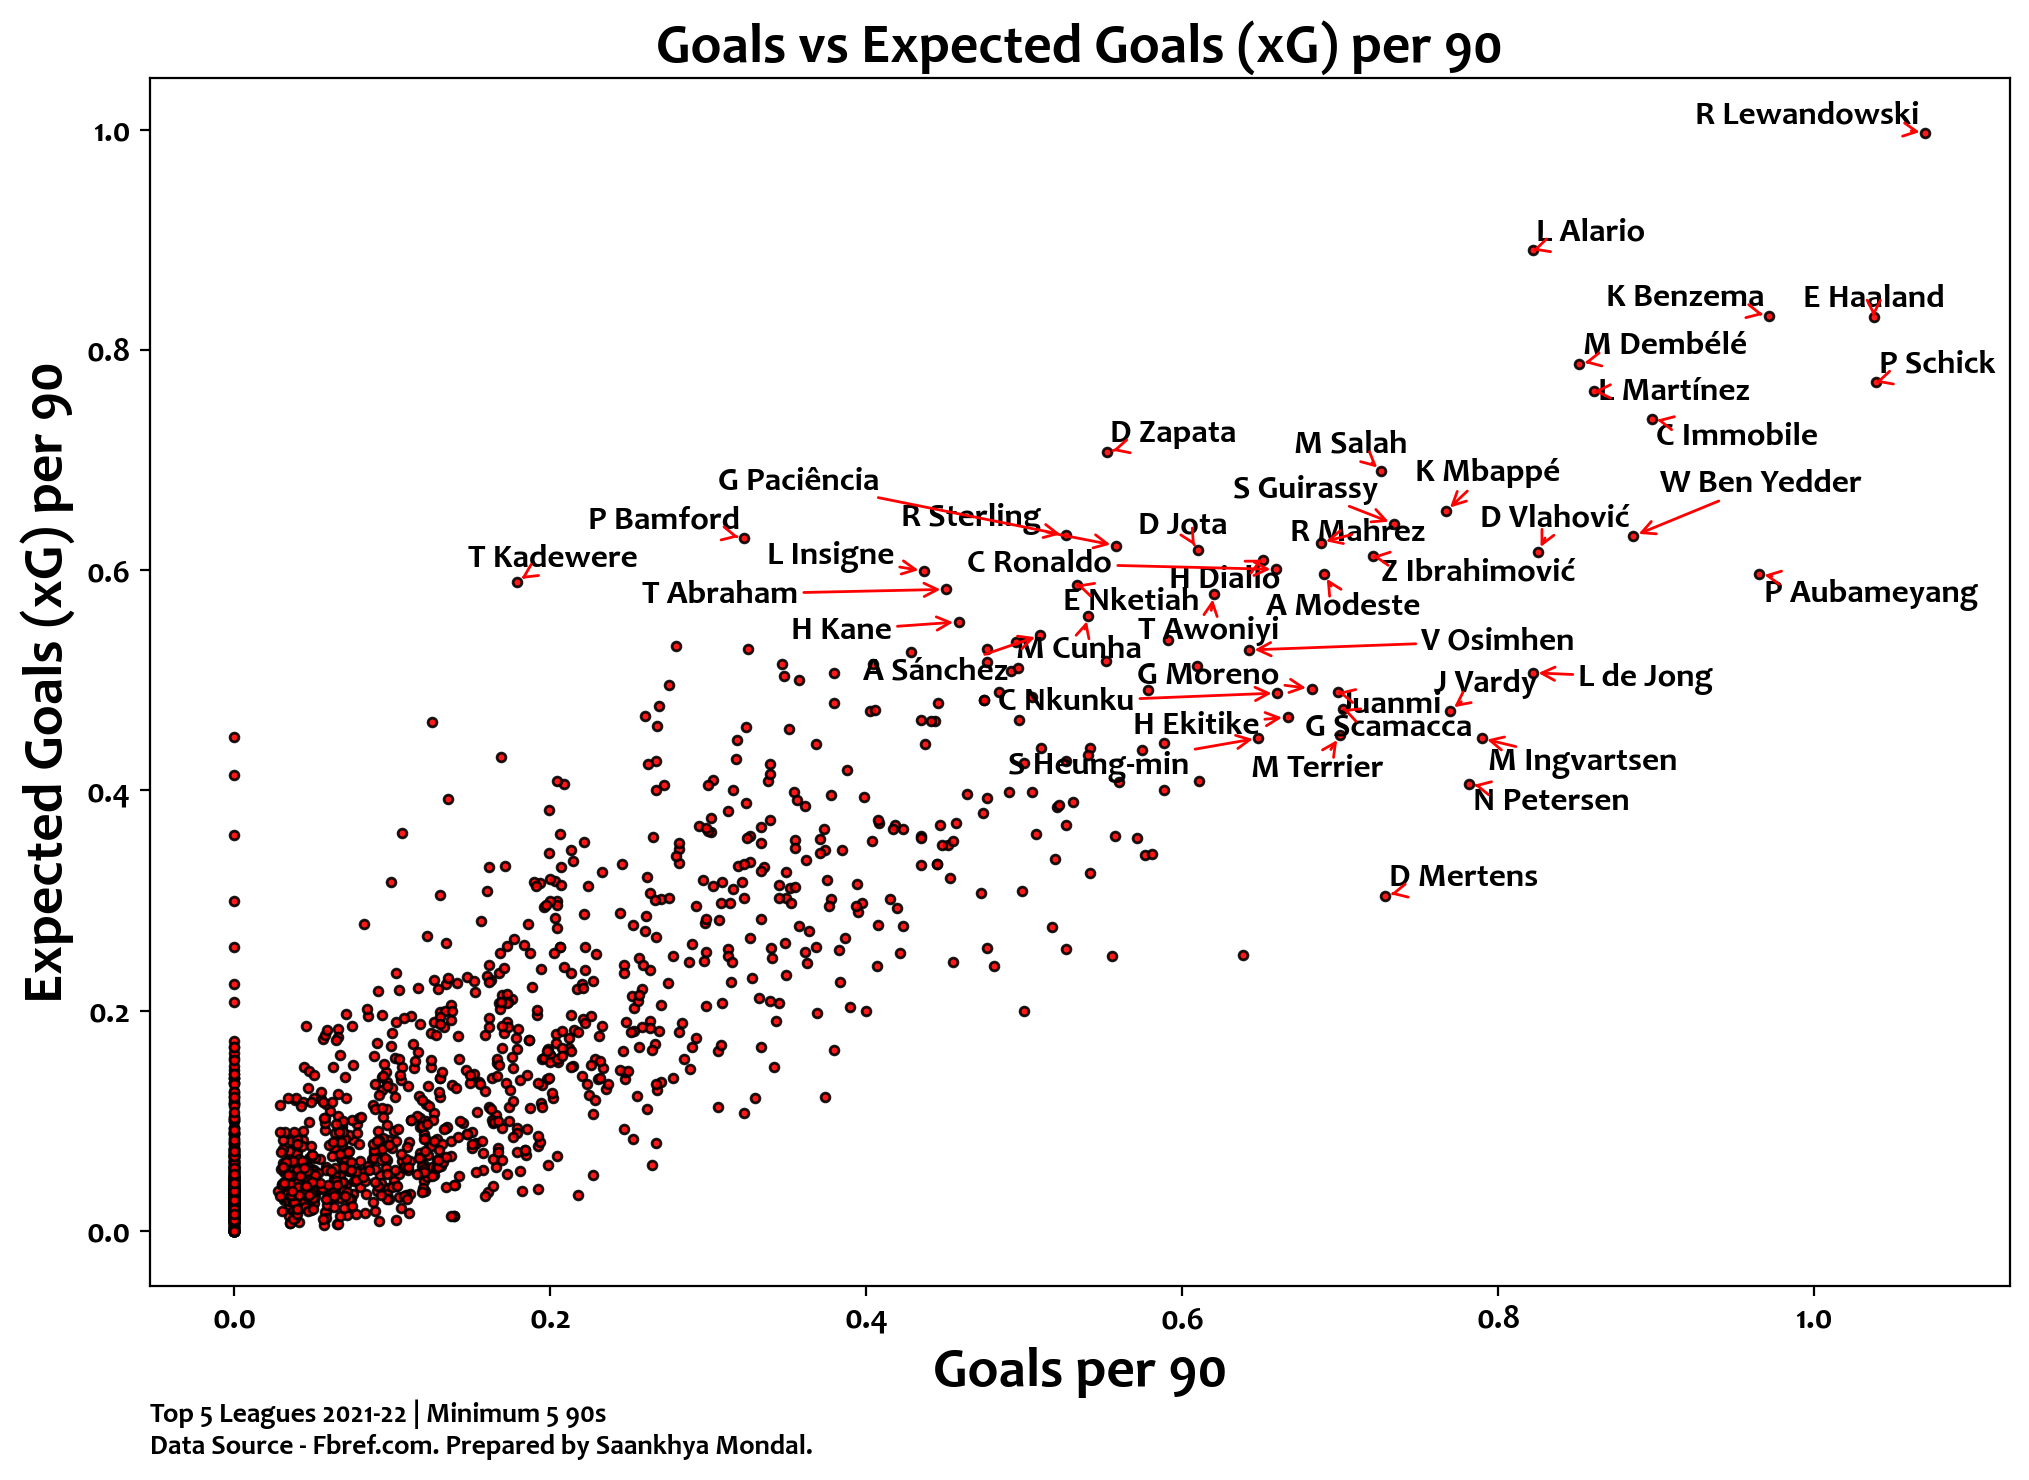

In [10]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['Glsp90'] = data['Gls']/data['90s']
data['xGp90'] = data['xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xGp90'].quantile(0.980)
outlier_bottom = data['xGp90'].quantile(0.03)
outlier_right = data['Glsp90'].quantile(0.980)
outlier_left = data['Glsp90'].quantile(0.03)

par_x = list(data['Glsp90'].astype(float))
par_y = list(data['xGp90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goals per 90', fontsize=20)
ax.set_ylabel('Expected Goals (xG) per 90', fontsize=20)
ax.set_title('Goals vs Expected Goals (xG) per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [11]:
fig.savefig('Images/GvsxGp90.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

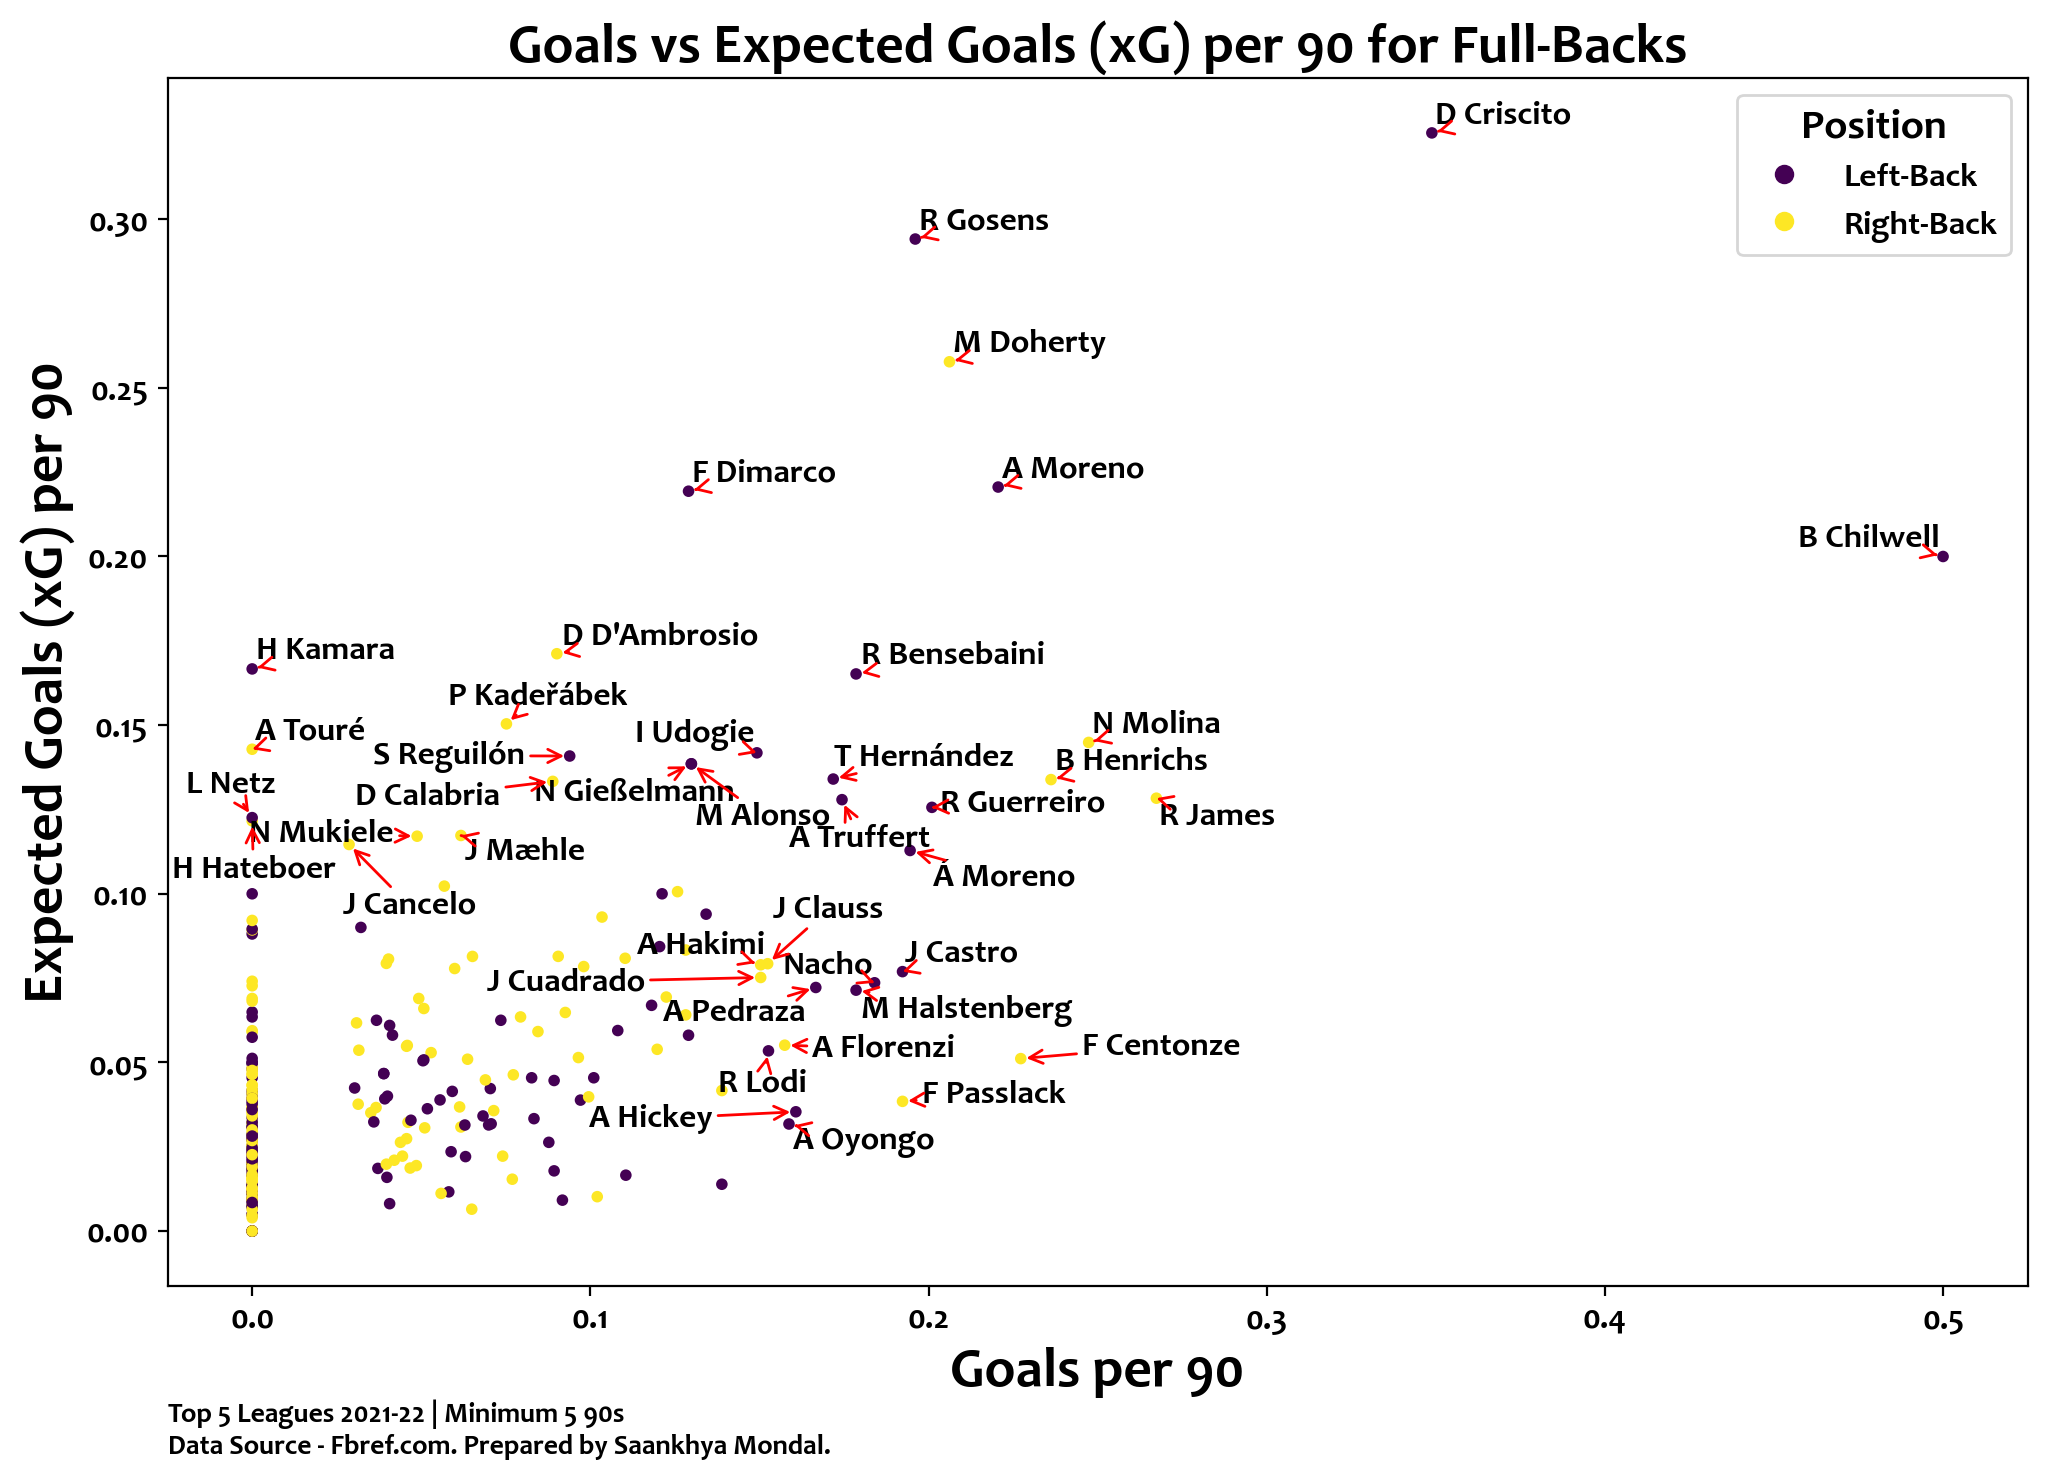

In [12]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data['Glsp90'] = data['Gls']/data['90s']
data['xGp90'] = data['xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xGp90'].quantile(0.900)
outlier_bottom = data['xGp90'].quantile(0.03)
outlier_right = data['Glsp90'].quantile(0.900)
outlier_left = data['Glsp90'].quantile(0.03)

par_x = list(data['Glsp90'].astype(float))
par_y = list(data['xGp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))
        
adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goals per 90', fontsize=20)
ax.set_ylabel('Expected Goals (xG) per 90', fontsize=20)
ax.set_title('Goals vs Expected Goals (xG) per 90 for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [13]:
fig.savefig('Images/GvsxGp90_FB.png', dpi=400, bbox_inches='tight')